In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train=pd.read_csv("X_train.csv").values
Y_train=pd.read_csv("Y_train.csv").values
X_test=pd.read_csv("X_test.csv").values
Y_test=pd.read_csv("Y_test.csv").values

In [3]:
# Analysing shapes of data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(500, 8)
(500, 1)
(268, 8)
(268, 1)


In [4]:
# Processing data for numpy operations
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [5]:
# Sigmoid function that gives probability of our outcome between 0 and 1

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [6]:
# Creating model for predicting outcomes

def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    CostValues = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = 1/m*np.dot(Y - A, X.T)
        dB = 1/m*np.sum(Y - A)
        
        W = W + learning_rate*dW.T
        B = B + learning_rate*dB
        
        # Keeping track of our cost function value
        CostValues.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [30]:
# Traing our model with train dataset
W, B, cost_list = model(X_train, Y_train, .00019, 1000000)

cost after  0 iteration is :  0.6931471805599454
cost after  100000 iteration is :  0.5900573087943145
cost after  200000 iteration is :  0.573015277144828
cost after  300000 iteration is :  0.5594420309881507
cost after  400000 iteration is :  0.5485609513734061
cost after  500000 iteration is :  0.5397724336715075
cost after  600000 iteration is :  0.5326175945473458
cost after  700000 iteration is :  0.5267466163275061
cost after  800000 iteration is :  0.521892572778782
cost after  900000 iteration is :  0.5178508553800824


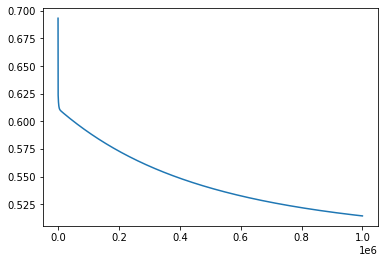

In [25]:
# visualizing decreasing cost function using matplotlib

plt.plot(np.arange(Iterations), cost_list)
plt.show()

In [28]:
# Finding accuracy of model outcomes comparing with test dataset

def Accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of our model is : ", round(acc, 2), "%")

In [29]:
# Our model is 79.48 % has accuracy in predicting outcomes
Accuracy(X_test, Y_test, W, B)

Accuracy of our model is :  79.48 %
